<a href="https://colab.research.google.com/github/Clarison/Analysis-of-heating-and-cooling-load/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file = files.upload() 
import pandas as pd
df_energy_efficiency = pd.read_excel('ENB2012_data.xlsx')

Saving ENB2012_data.xlsx to ENB2012_data.xlsx


In [ ]:
df_energy_efficiency.head()
df_energy_efficiency.columns = ["Relative_compactness", "Surface_area", "Wall_area", "Roof_area", "Overall_height", "Orientation", "Glazing_area", "Glazing_area_distribution", "Heating_load", "Cooling_load"]
df_energy_efficiency.head(10)


,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distribution,Heating_load,Cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [ ]:
df_energy_efficiency.shape

(768, 10)

In [ ]:
pd.isnull(df_energy_efficiency).sum()

Relative_compactness         0
Surface_area                 0
Wall_area                    0
Roof_area                    0
Overall_height               0
Orientation                  0
Glazing_area                 0
Glazing_area_distribution    0
Heating_load                 0
Cooling_load                 0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

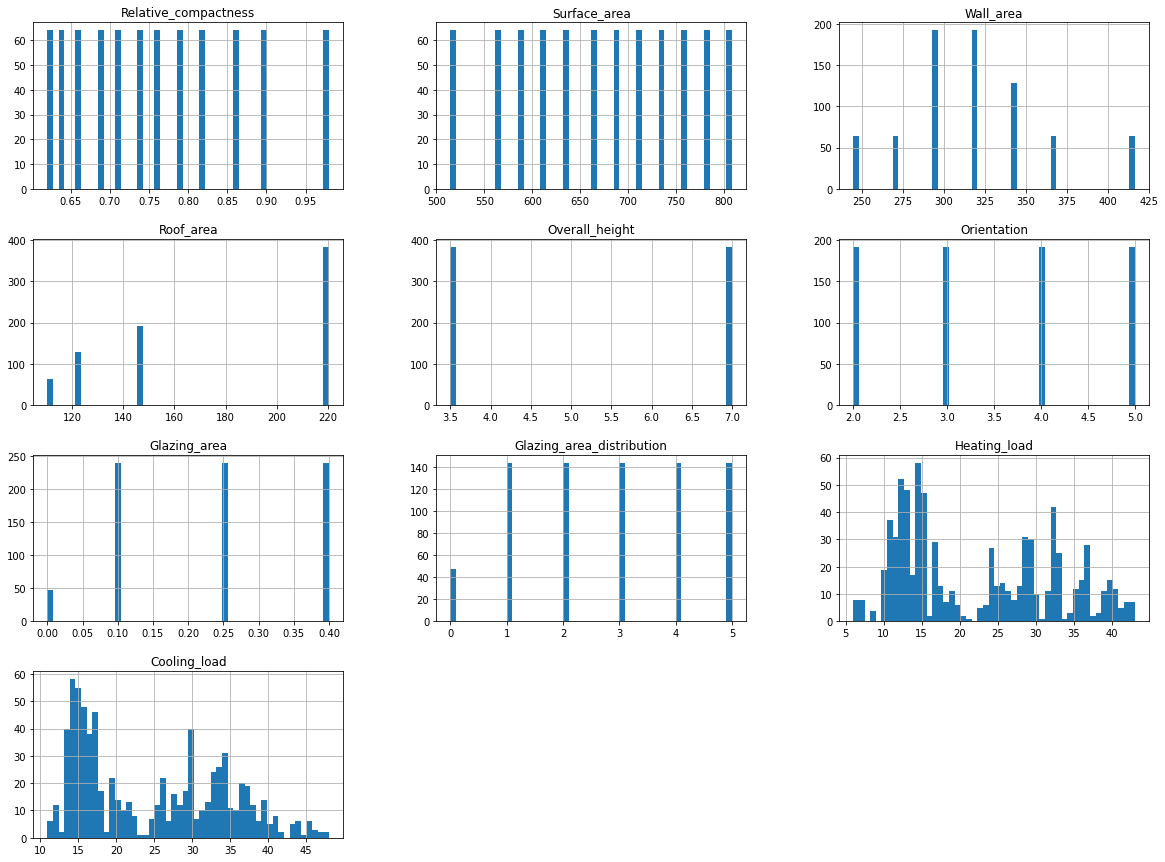

In [ ]:
df_energy_efficiency.hist(bins=50, figsize=(20,15))
plt.show()

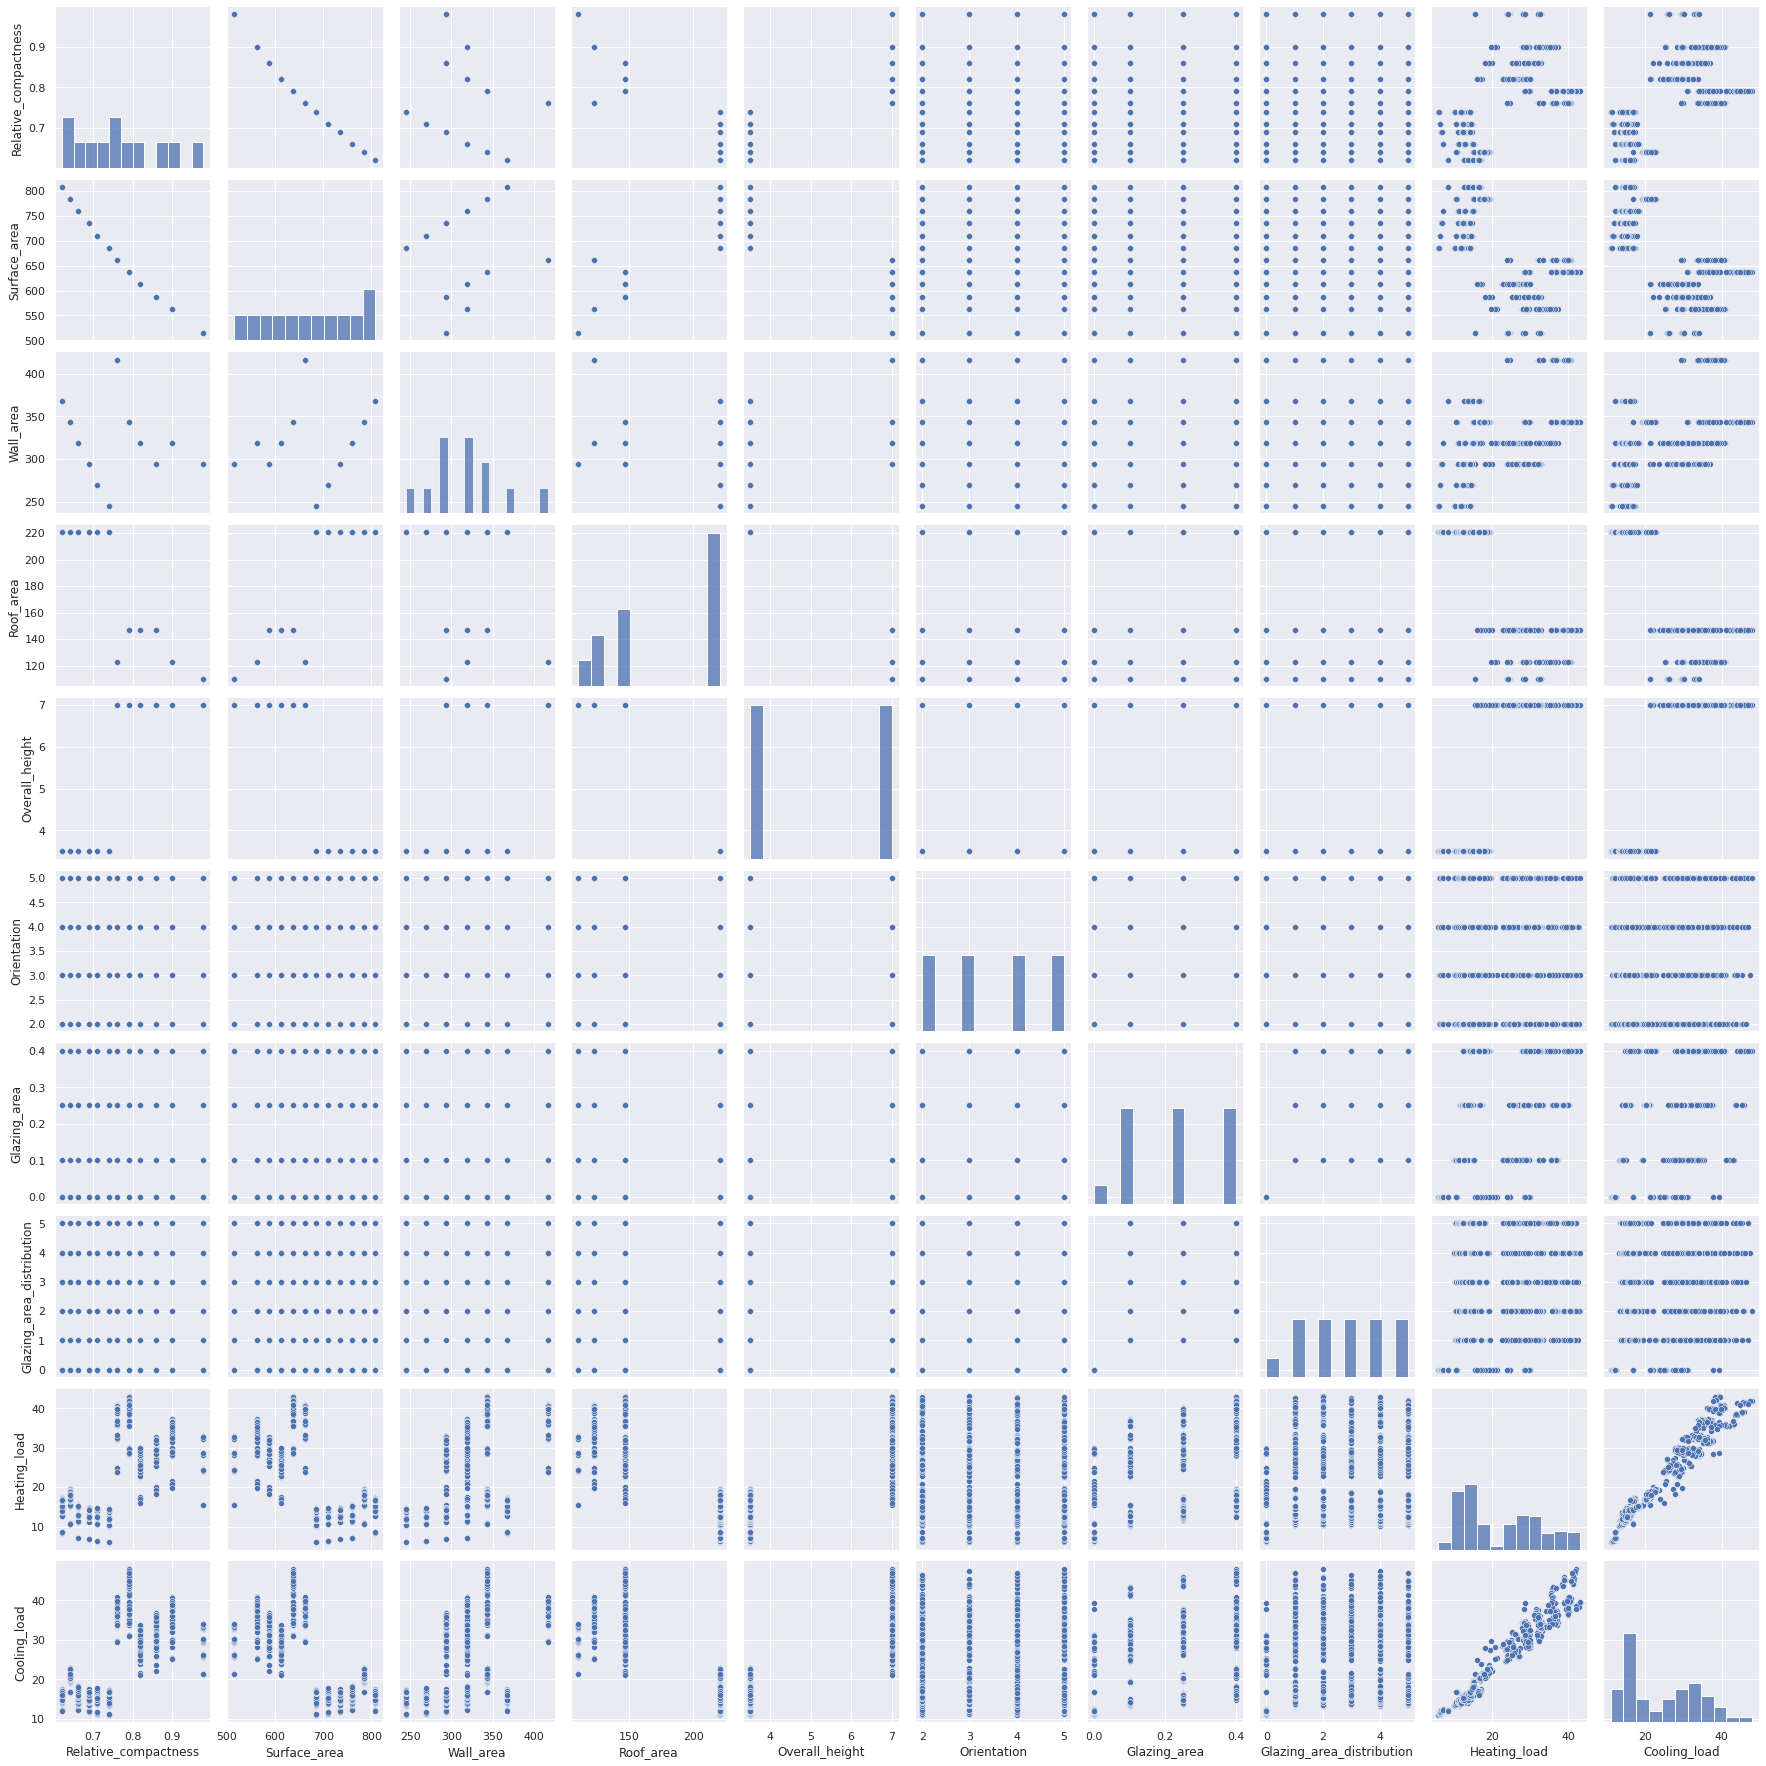

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(df_energy_efficiency)

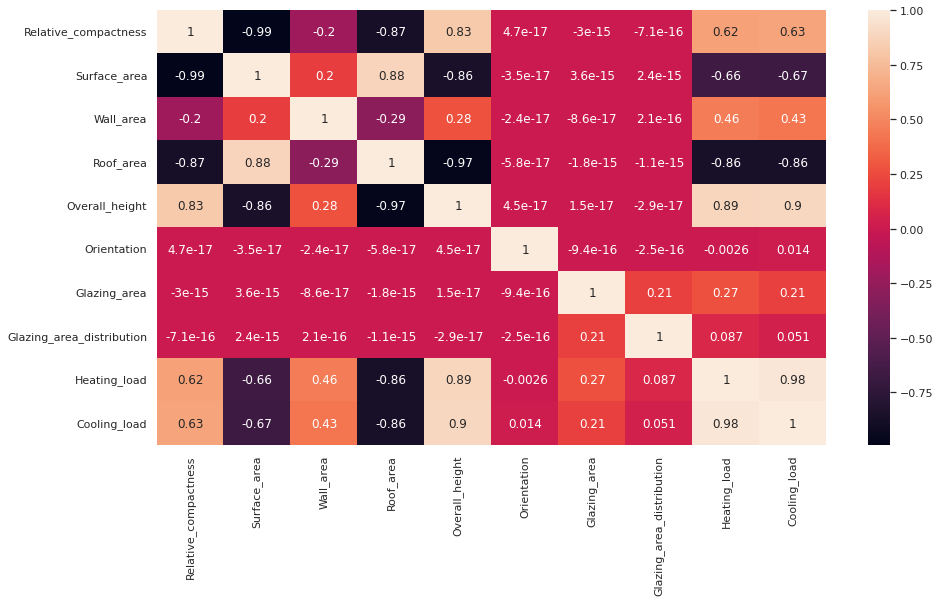

In [ ]:
df=df_energy_efficiency.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df,annot=True)

In [ ]:
df_energy_efficiency['Main_load'] = df_energy_efficiency['Heating_load'] + df_energy_efficiency['Cooling_load']
df_energy_efficiency.head()

,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distribution,Heating_load,Cooling_load,Main_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


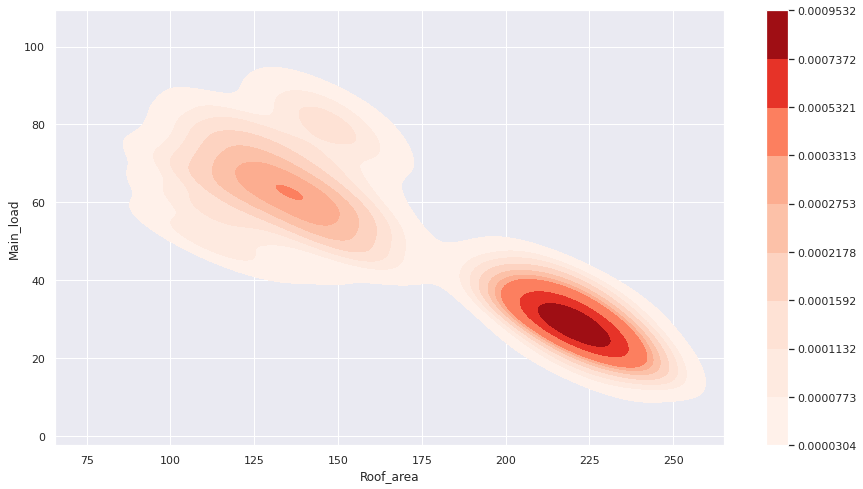

In [ ]:
sns.kdeplot(df_energy_efficiency.Roof_area,df_energy_efficiency.Main_load,cbar=True,cmap="Reds", shade=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


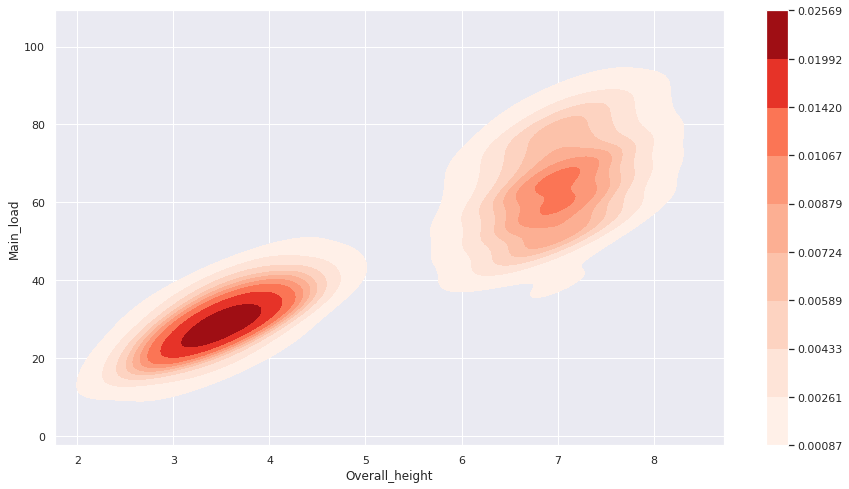

In [ ]:
sns.kdeplot(df_energy_efficiency.Overall_height,df_energy_efficiency.Main_load,cbar=True,cmap="Reds", shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


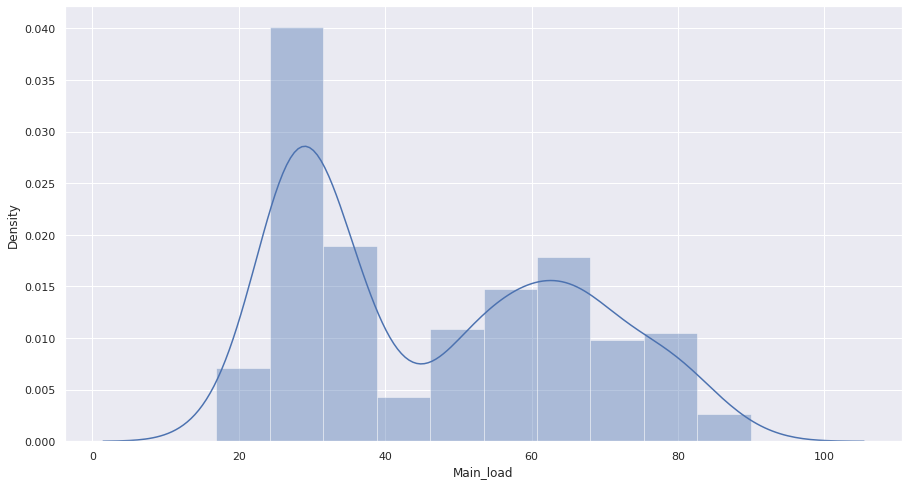

In [ ]:
sns.distplot(df_energy_efficiency['Main_load'])

In [ ]:
import numpy as np

df_energy_efficiency['Class'] = np.where(df_energy_efficiency['Main_load']<30, 'Low', np.where(df_energy_efficiency['Main_load']<70, 'Average', 'High'))
df_energy_efficiency.head()

,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distribution,Heating_load,Cooling_load,Main_load,Class
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,Average


In [ ]:
df_energy_efficiency['Class'].value_counts()

Average    429
Low        224
High       115
Name: Class, dtype: int64

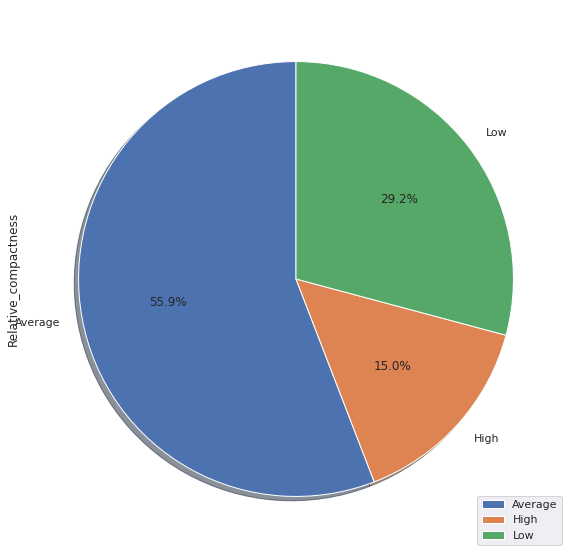

In [ ]:

import matplotlib.pyplot as plt

df2=df_energy_efficiency.groupby('Class').count().plot(kind='pie',y='Relative_compactness',
subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')



Outliner Detection 

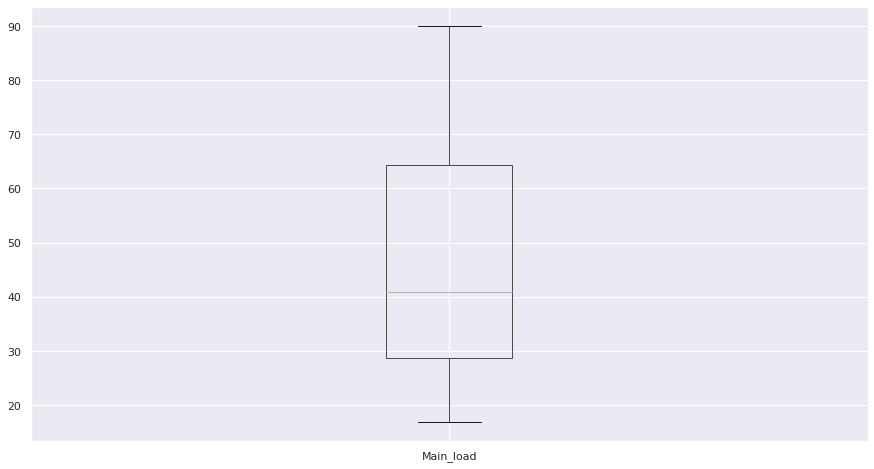

In [ ]:
df_energy_efficiency.boxplot(column='Main_load')

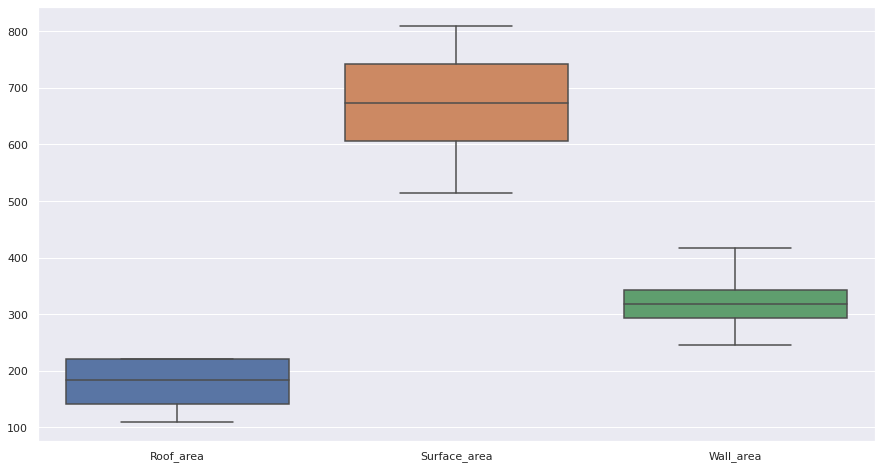

In [ ]:
data=df_energy_efficiency[['Roof_area','Surface_area','Wall_area']]
ax = sns.boxplot(data=data)

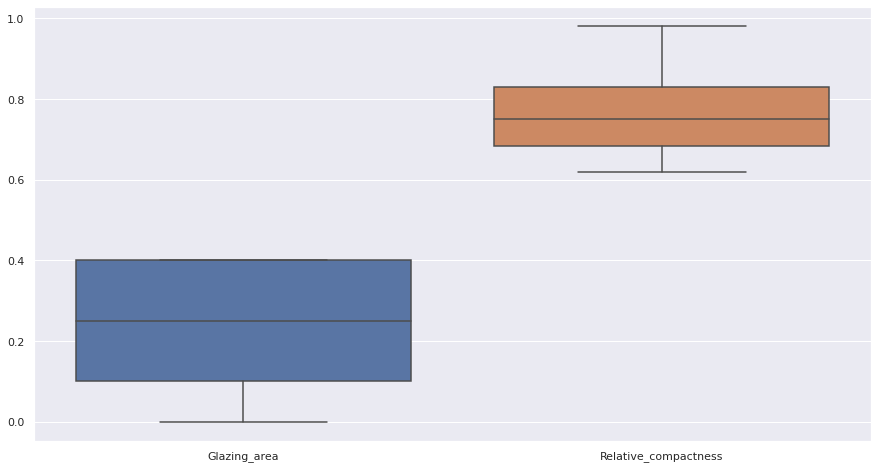

In [ ]:
data2=df_energy_efficiency[['Glazing_area','Relative_compactness']]
bx=sns.boxplot(data=data2)

According to visualizations there is no outlier present in the data

In [ ]:
df_energy_efficiency.columns

Index(['Relative_compactness', 'Surface_area', 'Wall_area', 'Roof_area',
       'Overall_height', 'Orientation', 'Glazing_area',
       'Glazing_area_distribution', 'Heating_load', 'Cooling_load',
       'Main_load', 'Class'],
      dtype='object')

In [ ]:
y1 = df_energy_efficiency.drop(columns=['Cooling_load','Main_load','Heating_load'])
y1


,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distribution,Class
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Average
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Average
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Average
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Average
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Average
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,Average
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,Average
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,Average
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,Average


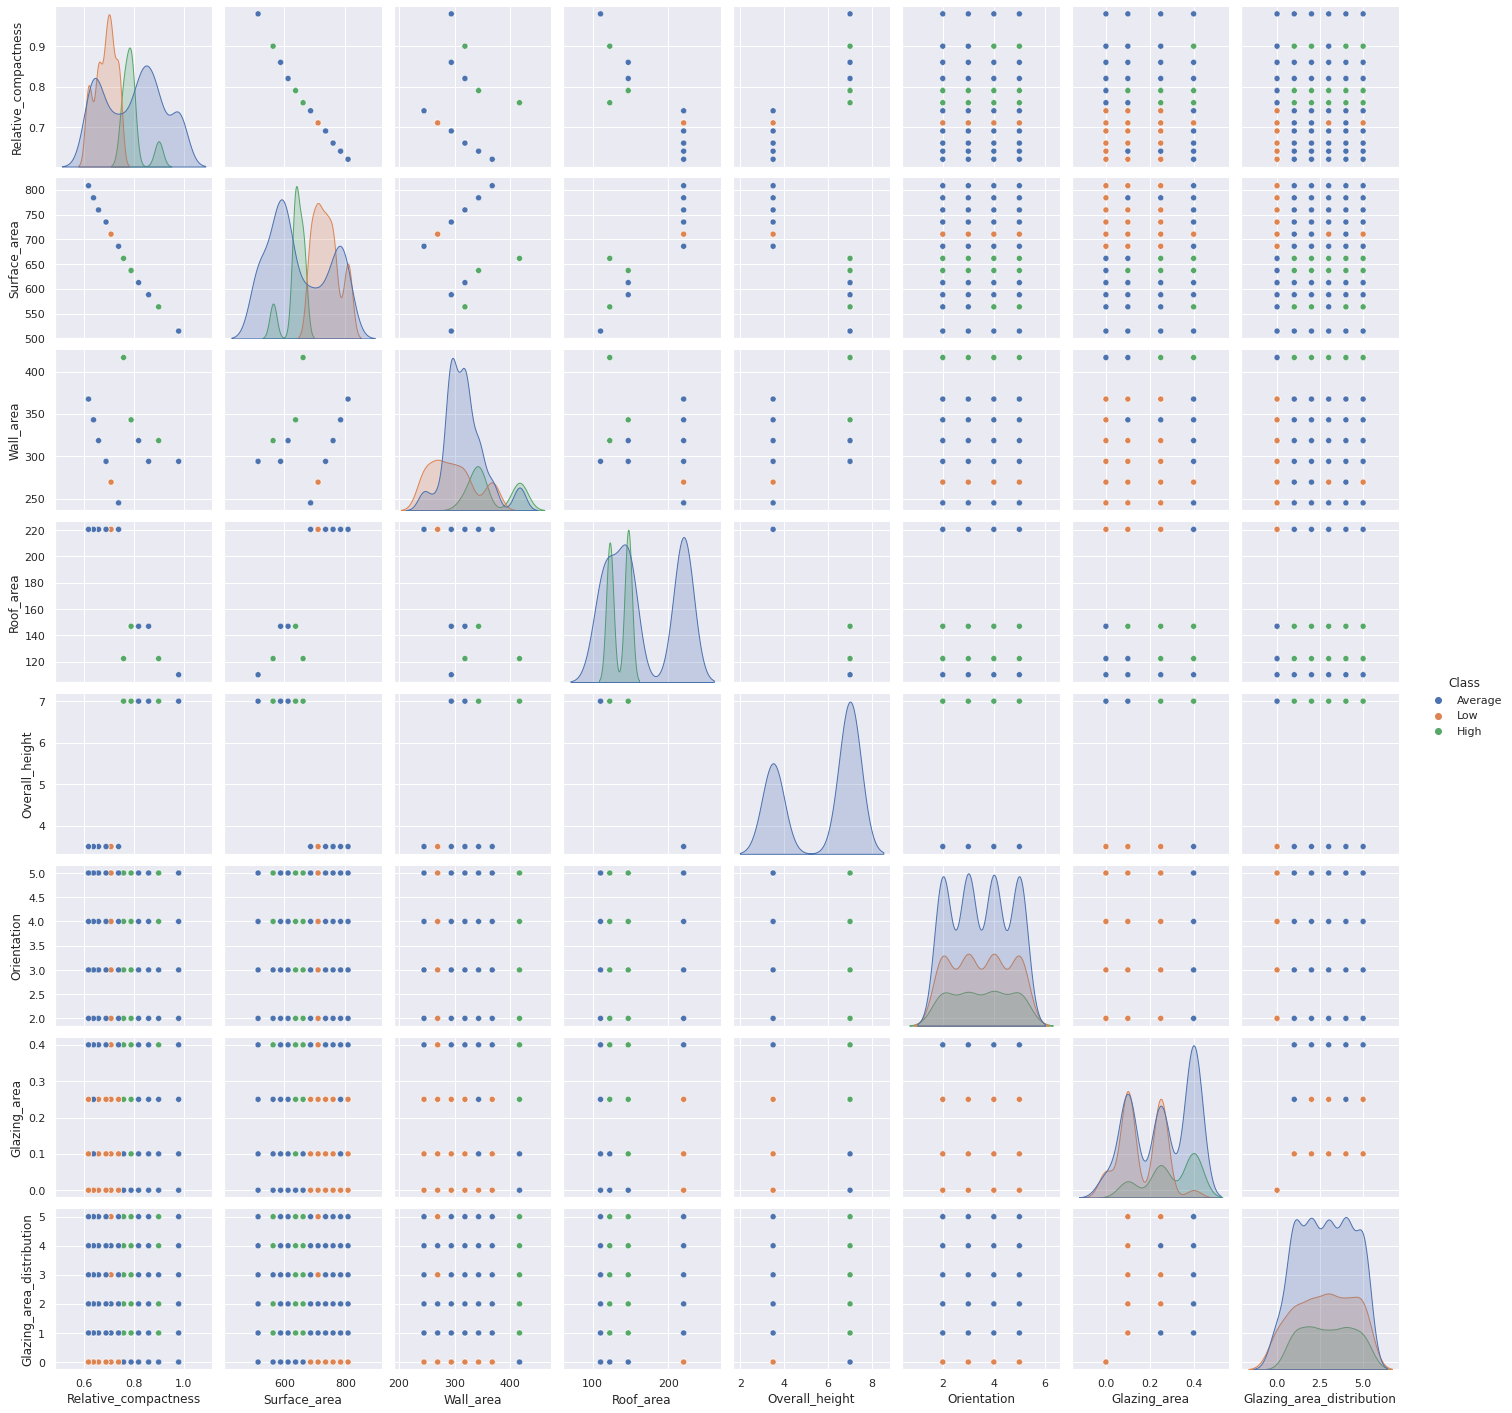

In [ ]:
sns.pairplot(y1,hue="Class")

PCA Dimension Reduction

In [ ]:
Data=df_energy_efficiency.iloc[:,0:8]
Data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(Data)
pca = PCA()
pca.fit(x)
print("explained Variance is :", pca.explained_variance_)
print('Proportion Varaince is:',pca.explained_variance_ratio_)
print('cummulative Proportion Varaince is:',np.cumsum(pca.explained_variance_ratio_))
print("First Two Components are:")
pd.Series(pca.components_[0]).sort_values(ascending=False)

explained Variance is : [3.70776711e+00 1.24146781e+00 1.21454566e+00 1.00130378e+00
 7.88061902e-01 5.28226666e-02 4.46132201e-03 7.01616686e-31]
Proportion Varaince is: [4.62867411e-01 1.54981414e-01 1.51620528e-01 1.25000000e-01
 9.83794724e-02 6.59423589e-03 5.56939125e-04 8.75878904e-32]
cummulative Proportion Varaince is: [0.46286741 0.61784882 0.76946935 0.89446935 0.99284882 0.99944306
 1.         1.        ]
First Two Components are:


4    4.962380e-01
0    4.959514e-01
2    3.251430e-02
6    7.793113e-17
5    8.937031e-18
7   -4.344939e-17
1   -5.017330e-01
3   -5.049622e-01
dtype: float64

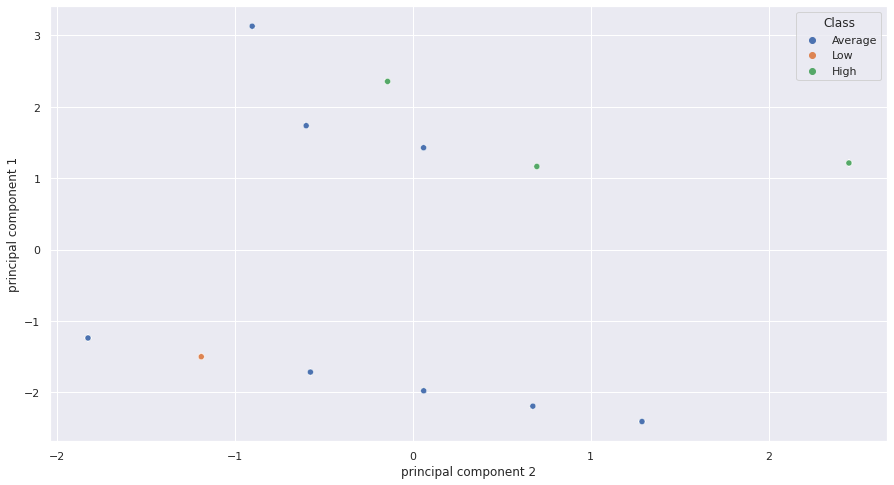

In [ ]:
pca=PCA(n_components=2)
p_c=pca.fit_transform(x)
y = pd.DataFrame(y1, columns=['Class'])
pc_data = pd.DataFrame(data = p_c
, columns = ['principal component 1', 'principal component 2'])
df1=pd.concat([pc_data,y],axis=1)
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=df1, x="principal component 2", y="principal component 1", hue="Class")

*work in progress.....*